In [10]:
import numpy as np
import graph_tools_construction as gt
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import to_tree

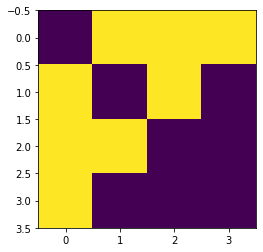

In [11]:
A = np.array( [ [0, 1, 1, 1],
                [1, 0, 1, 0],
                [1, 1, 0, 0], 
                [1, 0, 0, 0]])
# A = np.random.rand(100,100)
# A = A - np.diag(A)*np.eye(100)
plt.imshow(A)

In [12]:
clst_adj = []
nodes = np.arange(int(4))
clst_node = []
all_clusters_node = []

gt.cluster_laplace(A, clst_adj, nodes, 1, clst_node, all_clusters_node)


In [14]:
Z = gt.linkage_matrix(all_clusters_node, A, 'dumb')


In [28]:
root, tree = to_tree(Z, True)

In [34]:
tree[root.get_left().get_id()].is_leaf()

True

In [37]:
fiedler_switch = False

In [38]:
#partition the data using the fiedler vector
N1,N2 = gt.laplace_partition(A,fiedler_switch,1)
#sizes of the clusters
s1 = N1.size
s2 = N2.size
#nodes in each cluser
nodes1 = np.zeros(s1)
nodes2 = np.zeros(s2)
if s1 > 0:
    for i in range(s1):
        nodes1[i] = nodes[N1[i]]
if s2 > 0:
    for i in range(s2):
        nodes2[i] = nodes[N2[i]]
#adjacency matrix for each cluster
A1 = np.zeros((s1,s1))
A2 = np.zeros((s2,s2))
for i in range(s1):
    for j in range(s1):
        A1[i,j] = A[N1[i],N1[j]]
for i in range(s2):
    for j in range(s2):
        A2[i,j] = A[N2[i],N2[j]]


In [43]:
mx = np.ma.masked_array(A, mask=np.eye(A.shape[0]))
mx1 = np.ma.masked_array(A1, mask=np.eye(A1.shape[0]))
mx2 = np.ma.masked_array(A1, mask=np.eye(A2.shape[0]))


In [48]:
np.ma.median(mx)


1.0

In [ ]:
#add this cluster of nodes to the list of nodes
all_clusters_node.append(np.array([int(node) for node in nodes]))

#store the final clusters and their adjacency matrices
if s1 < min_clust_sz or s2 < min_clust_sz:
    clst_adj.append(A)
    clst_node.append(nodes)
#if we are not done, recurse
if s1 >= min_clust_sz and s2 >= min_clust_sz:
    cluster_laplace(A1, clst_adj, nodes1, min_clust_sz, clst_node, all_clusters_node)
    cluster_laplace(A2, clst_adj, nodes2, min_clust_sz, clst_node, all_clusters_node)